<a href="https://colab.research.google.com/github/shivanisharma543-ux/EDA_Assignment/blob/main/EDA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1. What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.
        AI: Scope: it is the umbrella concept of creating machines or programs that can simulate human intelligence to perform tasks.
            Focus: Its focus is to create intelligent systems.
            Techniques: Invovles rules, logic, search, ML, DL
            Applications: Robotics, self-driving cars.

        ML: Scope: it is a subset of AI that focuses on developing algorithms and models that enable systems to learn from data.
            Focus: it focuses on making algorithms for prediction and decision-making.
            Techniques: Involves supervised, unsupervised, reinforcement learning, regression and clustering.
            Applications: Recommendation systems, fraud detection, spam filters, stock prediction

        DL: Scope: it is a subset of ML that focuses on developing algorithms and models using multilayered neural networks.
            Focus: It focuses on complex pattern recognition and feature learning.
            Techniques: Involves deep learning, transformers, deep neural networks.
            Applications: Image and speech recognition, natural language processing,generative AI(ChatGPT etc.)

        Data Science: Scope: Interdisciplinary field that uses various techniques, algorithms, and tools to extract insights and knowledge from data.
                      Focus: It focuses on the end-to-end process of data analysis and insight generation.
                      Techniques: Involves statistics, ML, Data Mining, Visualization and programming.
                      Applications: Business analysis, market segmentation, clinical trial analysis.
  '''

In [ ]:
'''
2. Explain overfitting and underfitting in ML. How can you detect and prevent them?
      Overfitting: A model learns the training data too well, including noise and random fluctuations.
                   It performs very well on training data but poorly on test/unseen data.
                   Cause: Model is too complex-high variance, low bias.
                   Detection: Training accuracy very high, test accuracy very low.
                   Prevention: Regularization: L1(lasso: shrink weights, perform feature selection)
                                               L2(ridge: penalises large weights, reduce impact of less important features)
                                               Elastic Net: combination of L1 and L2.
                                               Dropout for neural networks.
                               cross-validation: Ensures model performance is consistent across different data splits.
                               Simplifying the model: Reduce depth and use fewer layers.
                               Early stopping:stop training when validation error begin rising.
                               More training data:Helps model generalise better.
      Underfitting: Model is too simple to learn the underlying pattern. It performs poorly on both training and test data.
                    Cause: Model is too simple-low variance, high bias.
                    Detection: Training accuracy very low, test accuracy very low.
                               Training and validation losses both high and close to each other.
                    Prevention: Increase Model complexity: Use more layers and flexible algorithms.
                                Reduce regularization
                                Train longer: More epochs for neural networks.
                                Add more relevant features: Use feature engineering.

  '''


In [ ]:
'''
3. How would you handle missing values in a dataset? Explain at least three methods with examples.
            -Missing values can be handled using three methods:
            1. Deletion method: If data is huge and missing values are less than 5% of the data then missing values can be dropped.
                               (a) Removing rows: Any row can be deleted if there is missing values.
                                                  Used when Very few missing values (<5%) and data is missing completely at random
                               (b) Removing columns: Any column can be deleted if there are too many missing values(70-90%).
                               Example:

                              Age	Salary
                              25	40k
                              30	NaN
                              NaN	50k

                              After listwise deletion:

                              Age	Salary
                              25	40k

                              Rows containing NaN are removed.
            2. Imputation method: Replacing missing values with the mean or median of that feature.
                                a) Mean Imputation:Good for normally distributed numerical data.
                                   Example:
                                          Age column:
                                          [20, 25, NaN, 35]
                                          Mean = (20 + 25 + 35) / 3 = 26.7
                                          After imputation:
                                          [20, 25, 26.7, 35]
                                b) Median Imputation:Good for skewed numerical data or data with outliers.
                                   Example: Salary column:
                                            [30k, 32k, 2,00,000, NaN]
                                            Median = 32k
                                            After imputation:
                                            [30k, 32k, 2,00,000, 32k]
          3. Predictive modeling: Use a model to predict missing values based on other features.
                                  How it works:Separate rows with missing values,Train a model on complete cases,Predict missing entries,Fill those predictions back into the dataset.
                                  xample (Using Regression Model)

                                Dataset:
                                Age	Experience	Salary
                                25	2	40k
                                30	5	50k
                                35	7	NaN
                                Goal → Predict missing Salary.
                                Steps:
                                Train a regression model:
                                Salary = f(Age, Experience)
                                using the first two rows.
                                Predict missing salary: Model predicts Salary for (Age=35, Exp=7) → e.g., 58k
                                Replace missing value.
                                Final dataset:
                                Age	Experience	Salary
                                25	2	          40k
                                30	5	          50k
                                35	7	          58k
'''






In [ ]:
'''
4. What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).
      -A dataset is called imbalanced when the number of samples in each class is not roughly equal.
       One class (majority class) has many samples, while another (minority class) has very few.
      -There are three techniques to handle imbalanced dataset.
      1. SMOTE: Synthetic minority over-sampling technique.
         SMOTE creates synthetic samples for the minority class instead of duplicating existing samples.
         It selects a minority sample and one of its k-nearest minority neighbors, then creates a synthetic point between them.
         This process is repeated until the desired balance is achieved.
         Example:
          from imblearn.over_sampling import SMOTE
          oversample  = SMOTE()
          X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])
          df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
          df2 = pd.DataFrame(y, columns = ['target'])
          smote_df = pd.concat([df1, df2], axis = 1)
      2. Random Over/Undersampling:
          (a)Random Oversampling: Increase minority samples by duplicating them.
          Randomly copy existing minority class rows until classes become balanced.
          Simple but increases risk of overfitting.
          Example:
          Class 0 → 900
          Class 1 → 100
          Oversample class 1 upto 900 to match majority.
          from imblearn.over_sampling import RandomOverSampler
          ros = RandomOverSampler()
          X_res, y_res = ros.fit_resample(X, y)

          (b)Random Undersampling: Randomly removes samples from the majority class to balance the dataset.
          Randomly delete rows from the majority class.
          Faster but may remove important information.
          Example:
          Class 0 → 900
          Class 1 → 100
          Undersample class 0 down to 100 to match minority.
          from imblearn.over_sampling import RandomOverSampler
          ros = RandomOverSampler()
          X_res, y_res = ros.fit_resample(X, y)
      3. Class Weights:Assign higher penalty to misclassifying minority class, so the model pays more attention to it.
                      Minority class → higher weight
                      Majority class → lower weight
                      Used in logistic regression, SVM, decision trees, neural networks.
                      Example:If classes are:
                      Class	Samples
                        0	    900
                        1	    100
                      Weights:
                      Class 0 → 1
                      Class 1 → 9 (because rarer)

                      Model becomes more sensitive to class 1.
                      from sklearn.linear_model import LogisticRegression
                      model = LogisticRegression(class_weight='balanced')
                      model.fit(X, y)



'''

In [ ]:
'''
5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.
          -Feature scaling is important because it ensures that all input features contribute equally to a model.
            Many algorithms are sensitive to the magnitude of feature values.
            Without scaling, features with large numeric ranges dominate those with small ranges.

          -It specially matters for distance and optimatization because:
           1. Distance-Based Algorithms (KNN, SVM, K-Means, etc.):
              -These algorithms compute distance between points (Euclidean, Manhattan).
              -If one feature has range 0–1000 and another 0–1, the high-range feature will dominate distance calculations.
              -This leads to biased decisions, incorrect neighbors (KNN), wrong margin boundaries (SVM), and poor clusters (K-Means).
           2. Gradient Descent (used in Linear/Logistic Regression, Neural Networks)
              -Features with different scales cause elongated cost contours, slowing convergence.
              -Gradient descent may oscillate and take many iterations to reach the optimum.
              -Scaling makes contours more circular → faster and more stable convergence.

          - Min-Max scaling vs Standardization
          MIN-MAX SCALING: Formula= x′=x-xmin/xmax​−xmin​
                           Range= Maps values to [0, 1] (sometimes [-1,1])
                           Highly affected by outliers.
                           Used in neural networks, image data, algorithms that require bounded inputs.
                           Effect on distribution: preserves shape but compresses range.
         STANDARDIZATION: Formula=x′=x−μ​/σ
                          Range=Mean = 0, Std = 1
                          Less affected by the outliers.
                          Used in linear/logistic regression, SVM, KNN, PCA.
                          Effect on distribution: Centers and scales but keep distribution shape.
  '''

In [ ]:
'''
6.Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?
          - Label Encoding: Assigns each category a unique integer.Example: {Red → 0, Blue → 1, Green → 2}
                            Preserves order if categories have a natural ranking.
                            Pros: Simple, memory-efficient and good for ordinal data.
                            Cons: Introduces artificial numerical relationships between categories(algorithm may think “Green > Blue > Red”)
                                  Can mislead distance-based or linear models.
          - One-Hot Encoding: Creates binary columns for each category.Example:Example (Red, Blue, Green):→[1,0,0], [0,1,0], [0,0,1].
                              Pros: No ordinal relationship imposed. Works well with nominal variables.
                              Cons: Increases dimensionality (problematic with many categories). More memory & computation.

          - When to use which:
            - Use label encoding when: The categories have natural order like education level(high school<Graduate<PG), shirt sizes(S,M,L,XL).
                                       This preserves the inherent ranking.
            - Use one-hot encoding when: The categories are nominal and do not have a natural order. e.g colours, cities, types of animals etc.
                                         This prevents algorithms from assuming incorrect numeric relationships.

'''



In [1]:
#7.Question 7: Google Play Store Dataset
#a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?
#Dataset: https://github.com/MasteriNeuron/datasets.git

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Download the dataset if not present
import os
file_path = '/content/googleplaystore.csv'
# Raw GitHub URL for the file
github_url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv'

if not os.path.exists(file_path):
    print(f"Downloading {os.path.basename(file_path)}...")
    !wget -q {github_url} -O {file_path}
    print("Download complete.")

# Load dataset
df = pd.read_csv(file_path)


# Clean Rating column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating', 'Category'])

# Calculate average ratings per category
avg_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

avg_ratings




Download complete.


,Rating
Category,
1.9,19.000000
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571


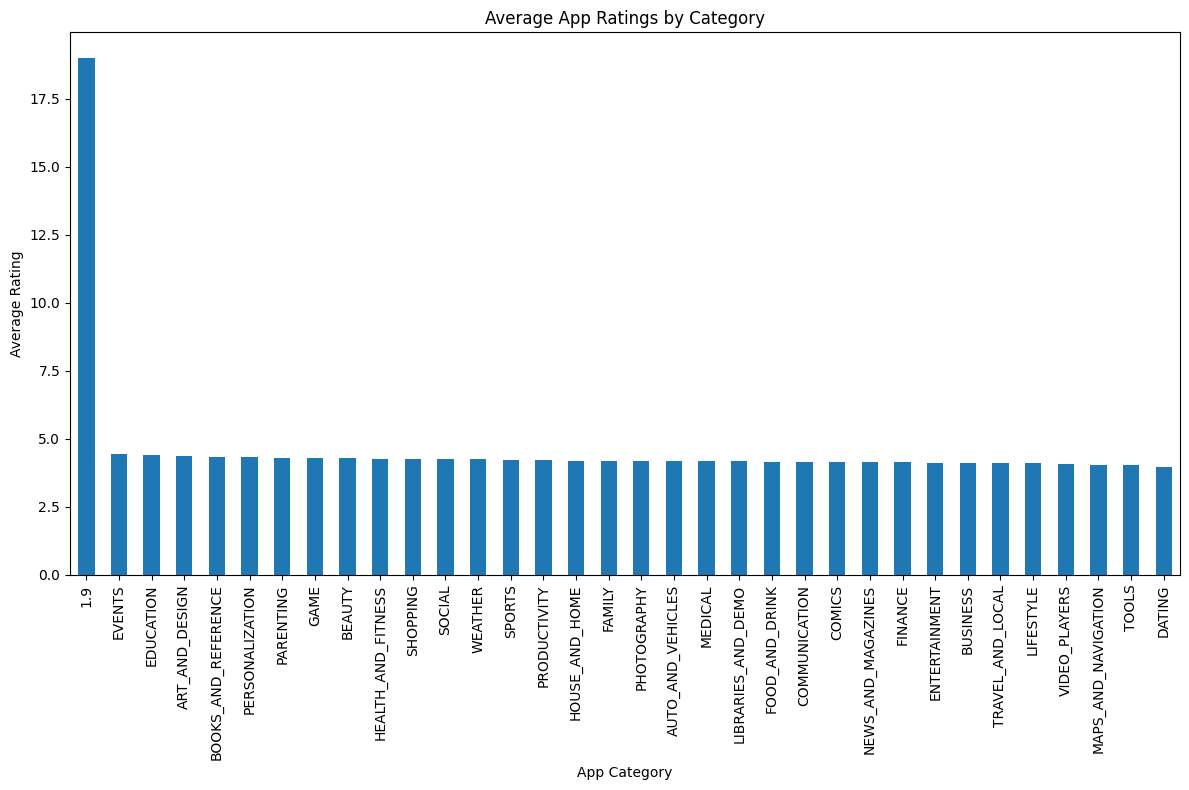

In [3]:
plt.figure(figsize=(12, 8))
avg_ratings.plot(kind='bar')
plt.xlabel("App Category")
plt.ylabel("Average Rating")
plt.title("Average App Ratings by Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


'''
    - The top three highest rated categories were
      Events with average rating of 4.44,
      Education with average rating of 4.39 and
      Art_and_Design with average rating of 4.36
      the possible reasons for the ratings could be:
      simple functionality, high user satifaction and utility, fewer bugs, creative tools and niche audiences with positive experiences.

  - The lowest rated categories were
      Dating (avg rating 3.9), tools (avg rating 4.04)
      the possible reasons for the rating could be:
      High user expectations, poor match quality, subscription issues, privacy concerns.
      Many low-quality apps, intrusive ads, performance issues.

'''




In [4]:
'''
8. Question 8: Titanic Dataset
a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
'''
#Dataset: https://github.com/MasteriNeuron/datasets.git
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- FIX START ---
# Download the dataset if not present
import os
file_path_titanic = '/content/titanic.csv'
github_url_titanic = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv'

if not os.path.exists(file_path_titanic):
    print(f"Downloading {os.path.basename(file_path_titanic)}...")
    !wget -q {github_url_titanic} -O {file_path_titanic}
    print("Download complete.")

# Load the dataset
df = pd.read_csv(file_path_titanic)
# --- FIX END ---

# --- Part a: Pclass Survival Rate Comparison ---
# Calculate survival rate (mean of 'Survived') for each 'Pclass'
pclass_survival = df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)

print("--- Part a: Survival Rates by Passenger Class (Pclass) ---")
print(pclass_survival.to_string())

'''
The class with the highest survival rate was First Class (Pclass 1), with a survival rate of approximately 63.0%.
  -The primary reason is the well-documented "women and children first" protocol, coupled with the location and priority of the First Class cabins.
  -Cabin Location: First Class cabins were generally on the higher decks of the ship, which meant they had quicker and easier access to the lifeboats as the ship sank.
  -Wealth and Influence: First Class passengers represented the wealthiest and most influential people aboard. It's plausible that their social standing afforded them better prioritization and access during the chaotic evacuation.
  -Space and Comfort: The First Class areas were less crowded than the steerage (Third Class) areas, which may have led to a more orderly and efficient mobilization of passengers from those areas to the lifeboats.
'''



Download complete.
--- Part a: Survival Rates by Passenger Class (Pclass) ---
Pclass
1    0.629630
2    0.472826
3    0.242363


In [5]:
#part (b) Survival rates based on age groups
# Create Age Group column: 'Child' if Age < 18, 'Adult' otherwise (including NaN ages)
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Calculate survival rate for each 'AgeGroup'
age_survival = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)

print("\n--- Part b: Survival Rates by Age Group (Child < 18, Adult >= 18) ---")
print("Note: Passengers with missing 'Age' were grouped with 'Adults'.")
print(age_survival.to_string())

'''
The analysis grouped passengers into Children (Age < 18) and Adults (Age > 18).
The passengers with missing Age data were included in the 'Adult' group for this analysis.

Yes. Children (Age < 18) had a significantly better chance of survival (approx. 54.0% survival rate) compared to adults (Age>18, survival rate=36%).
This difference is consistent with the established "women and children first" maritime principle enforced during the evacuation.
'''



--- Part b: Survival Rates by Age Group (Child < 18, Adult >= 18) ---
Note: Passengers with missing 'Age' were grouped with 'Adults'.
AgeGroup
Child    0.539823
Adult    0.361183


In [7]:
'''
9. Flight Price Prediction Dataset
a) How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.
b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?
Dataset: https://github.com/MasteriNeuron/datasets.git
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# Download the dataset if not present
file_path_flight = '/content/flight_price.csv'
github_url_flight = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv'

if not os.path.exists(file_path_flight):
    print(f"Downloading {os.path.basename(file_path_flight)}...")
    !wget -q {github_url_flight} -O {file_path_flight}
    print("Download complete.")


# Load the dataset
df = pd.read_csv(file_path_flight)

price_by_days = (df.groupby('days_left')['price'].agg(['mean', 'median']).reset_index().sort_values('days_left'))
print(price_by_days.head())

Download complete.
   days_left          mean   median
0          1  21591.867151  15163.0
1          2  30211.299801  18017.5
2          3  28976.083569  16333.0
3          4  25730.905653  13054.0
4          5  26679.773368  13054.0


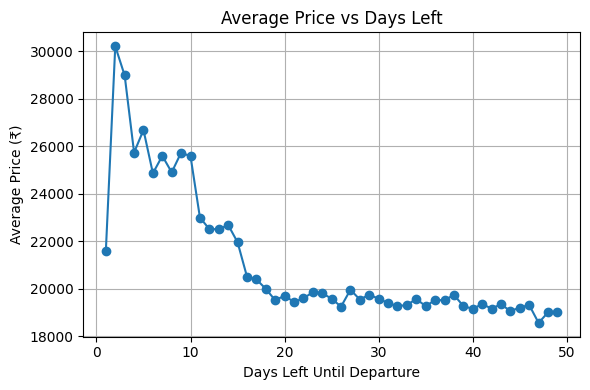

In [8]:
# Plotting the data
plt.figure(figsize=(6,4))
plt.plot(price_by_days['days_left'], price_by_days['mean'], marker='o')
plt.xlabel("Days Left Until Departure")
plt.ylabel("Average Price (₹)")
plt.title("Average Price vs Days Left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 3. Detect exponential price surges (day-to-day % change)
price_by_days['pct_change'] = price_by_days['mean'].pct_change() * 100
surges = price_by_days[price_by_days['pct_change'].abs() > 10]
print("Exponential surge days:")
print(surges)

Exponential surge days:
    days_left          mean   median  pct_change
1           2  30211.299801  18017.5   39.919811
3           4  25730.905653  13054.0  -11.199505
10         11  22990.656070  11520.0  -10.097295


In [10]:
# 4. Booking window analysis: bin days into ranges
bins = [0,3,7,14,21,30,40,50]
labels = ["0-3","4-7","8-14","15-21","22-30","31-40","41-49"]

df['booking_window'] = pd.cut(df['days_left'], bins=bins, labels=labels, include_lowest=True)

window_stats = (df.groupby('booking_window')['price'].mean().reset_index())
print("Average price by booking window:")
print(window_stats)

Average price by booking window:
  booking_window         price
0            0-3  28068.681894
1            4-7  25698.242059
2           8-14  23768.362808
3          15-21  20201.005958
4          22-30  19647.445561
5          31-40  19393.765657
6          41-49  19108.742210


In [11]:
# 5. Compare last-minute vs best window
last_minute = window_stats.loc[window_stats['booking_window']=="0-3", 'price'].iloc[0]
best_window  = window_stats.loc[window_stats['booking_window']=="41-49", 'price'].iloc[0]

increase_pct = (last_minute - best_window) / best_window * 100
print(f"Last-minute prices are {increase_pct:.2f}% more expensive than booking 41–49 days early.")

Last-minute prices are 46.89% more expensive than booking 41–49 days early.


In [13]:
#(b)Airline Price Comparison for Delhi–Mumbai

# 1. Filter route: Delhi to Mumbai
dm = df[(df['source_city'] == "Delhi") & (df['destination_city'] == "Mumbai")]

# 2. Summary stats by airline
airline_stats = (dm.groupby('airline')['price'].agg(['mean','median','min','max','count']).reset_index().sort_values('mean'))
print("Delhi–Mumbai prices by airline:")
print(airline_stats)


Delhi–Mumbai prices by airline:
     airline          mean   median   min    max  count
0    AirAsia   3981.191456   2410.0  2409  29501    632
3     Indigo   4473.739130   3570.0  2381  15720   1656
4   SpiceJet   4628.251984   3519.0  2281  19464    504
2   GO_FIRST   5762.211515   5806.0  2410  23685   1650
1  Air_India  23695.916916  17295.0  2476  68038   5007
5    Vistara  26630.293322  21718.5  2476  95657   5840


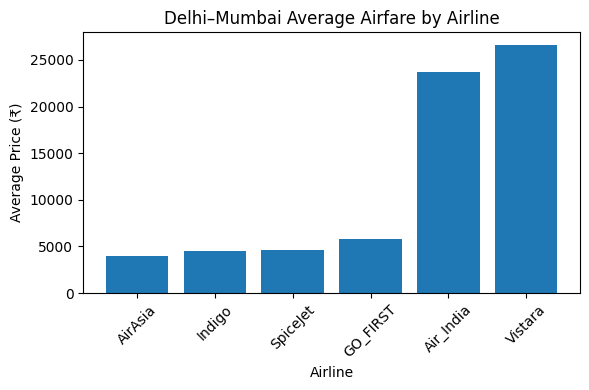

In [14]:
# 3. Bar plot
plt.figure(figsize=(6,4))
plt.bar(airline_stats['airline'], airline_stats['mean'])
plt.xlabel("Airline")
plt.ylabel("Average Price (₹)")
plt.title("Delhi–Mumbai Average Airfare by Airline")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# 4. Premium factor (example: Vistara / AirAsia)
vistara_mean = airline_stats.loc[airline_stats['airline']=="Vistara", 'mean'].iloc[0]
airasia_mean = airline_stats.loc[airline_stats['airline']=="AirAsia", 'mean'].iloc[0]
premium_factor = vistara_mean / airasia_mean
print(f"Vistara is ~{premium_factor:.2f}x AirAsia average fare.")

Vistara is ~6.69x AirAsia average fare.


In [3]:
'''
10.a). What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
b). Are employees with more projects more likely to leave?
Dataset: hr_analytics
'''
#Factors most strongly correlate with employee attrition
import pandas as pd
import matplotlib.pyplot as plt
import os

# Download the dataset if not present
hr_path = '/content/hr_analytics.csv'
github_url_hr = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv'

if not os.path.exists(hr_path):
    print(f"Downloading {os.path.basename(hr_path)}...")
    !wget -q {github_url_hr} -O {hr_path}
    print("Download complete.")

# 1. Load dataset
hr_df = pd.read_csv(hr_path)
# 2. Quick structure and sample
print(hr_df.info())
print(hr_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86  

In [4]:
# 3. Summary stats
print(hr_df.describe())


       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [6]:
# 4. Correlation matrix for numeric columns
corr = hr_df.corr(numeric_only=True)
print("Full correlation matrix:\n", corr)

Full correlation matrix:
                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
ave

In [7]:
# 5. Correlation of each feature with attrition (left)
corr_with_left = corr['left'].sort_values(ascending=False)
print("Correlation with attrition (left):\n", corr_with_left)

Correlation with attrition (left):
 left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


In [8]:
# 6. Mean values of key factors by attrition status
group_means = hr_df.groupby('left')[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'number_project']].mean()
print("Mean features by attrition status:\n", group_means)

Mean features by attrition status:
       satisfaction_level  average_montly_hours  time_spend_company  \
left                                                                 
0               0.666810            199.060203            3.380032   
1               0.440098            207.419210            3.876505   

      number_project  
left                  
0           3.786664  
1           3.855503  


/tmp/ipython-input-2427191160.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sat_stayed, sat_left], labels=['Stayed (0)', 'Left (1)'])


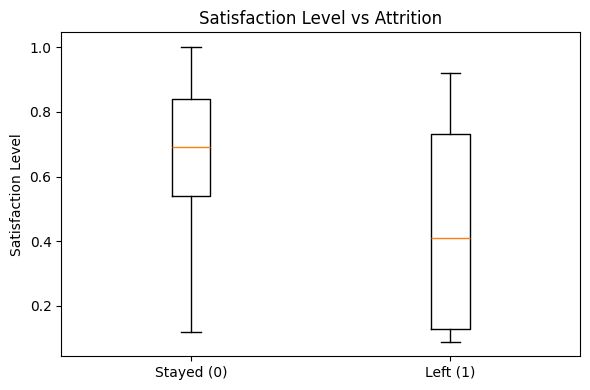

In [9]:
# 7. Boxplot: satisfaction vs attrition
plt.figure(figsize=(6,4))
sat_stayed = hr_df[hr_df['left'] == 0]['satisfaction_level']
sat_left   = hr_df[hr_df['left'] == 1]['satisfaction_level']

plt.boxplot([sat_stayed, sat_left], labels=['Stayed (0)', 'Left (1)'])
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level vs Attrition")
plt.tight_layout()
plt.show()

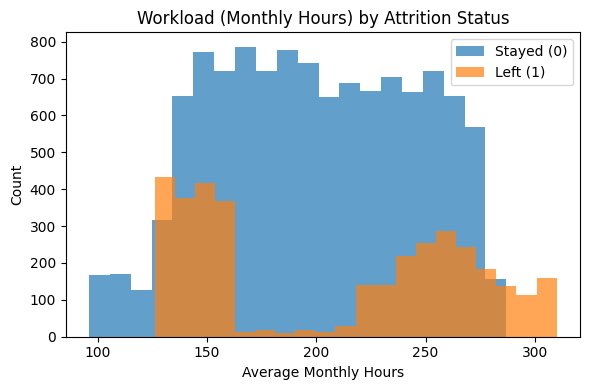

In [10]:
# 8. Histogram: monthly hours by attrition status
plt.figure(figsize=(6,4))

hours_stayed = hr_df[hr_df['left'] == 0]['average_montly_hours']
hours_left   = hr_df[hr_df['left'] == 1]['average_montly_hours']

plt.hist(hours_stayed, bins=20, alpha=0.7, label='Stayed (0)')
plt.hist(hours_left,   bins=20, alpha=0.7, label='Left (1)')

plt.xlabel("Average Monthly Hours")
plt.ylabel("Count")
plt.title("Workload (Monthly Hours) by Attrition Status")
plt.legend()
plt.tight_layout()
plt.show()

   salary  attrition_rate
0    high        0.066289
1     low        0.296884
2  medium        0.204313


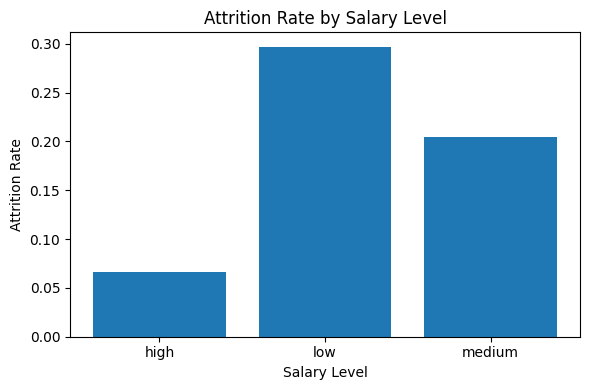

In [11]:
# 9. Attrition rate by salary level
attrition_by_salary = (hr_df.groupby('salary')['left'].mean().reset_index().rename(columns={'left': 'attrition_rate'}))
print(attrition_by_salary)

# 10. Bar chart: salary vs attrition rate
plt.figure(figsize=(6,4))
plt.bar(attrition_by_salary['salary'], attrition_by_salary['attrition_rate'])
plt.xlabel("Salary Level")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Salary Level")
plt.tight_layout()
plt.show()

In [ ]:
#Most influential factors for attrition in this dataset:
'''
Low satisfaction (strongest negative correlation).
Low salary (especially “low” vs “high” bands).
High workload / overtime (very high monthly hours).
Long tenure without promotion (time_spend_company ↑, promotion_last_5years usually 0).
'''



In [12]:
#(b)Are employees with more projects more likely to leave?
# 11. Attrition rate by number of projects
attrition_by_projects = (hr_df.groupby('number_project')['left'].mean().reset_index().rename(columns={'left': 'attrition_rate'}))
print(attrition_by_projects)


   number_project  attrition_rate
0               2        0.656198
1               3        0.017756
2               4        0.093700
3               5        0.221659
4               6        0.557922
5               7        1.000000


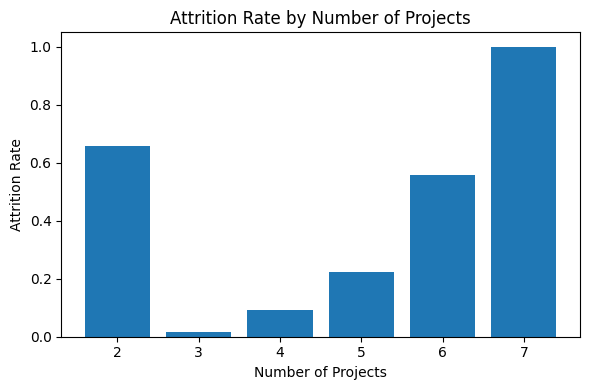

In [13]:
# 12. Bar chart: attrition vs number_project
plt.figure(figsize=(6,4))
plt.bar(attrition_by_projects['number_project'],
        attrition_by_projects['attrition_rate'])
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Number of Projects")
plt.xticks(attrition_by_projects['number_project'])
plt.tight_layout()
plt.show()

In [ ]:
# In conclusion, yes, employees with more projects (5+) are much more likely to leave.
# But both extremes (too few or too many projects) are risky. The safest region is 3–4 projects.